In [1]:
import pandas as pd
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk import FreqDist
from nltk.util import ngrams
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
DATASETS_PATH = '../dataset/5_processed/'

In [3]:
def load_data(filename):
    data = pd.read_csv(filename)
    return data['Text'].tolist(), data['Label'].tolist()

In [4]:
# LOADING DATASET

data_X, data_Y = load_data(DATASETS_PATH + 'dataset.csv')

print("Data length: \t", len(data_X))

Data length: 	 59164


In [5]:
def preprocessing(tweets):
    """
    Perform preprocessing of the tweets

    Args:
        tweets : list of tweets
    
    Returns:
        result: preprocessed list of tweets
    """
    #set of stopwords
    stop_words = set(stopwords.words('english'))
    
    result = []
    for tweet in tweets:
        
        #tokenizing each tweet
        tokens = word_tokenize(tweet)
        
        #removing stopwords
        stopwords_removed_tokens = []
        for word in tokens:
            if word not in stop_words:
                stopwords_removed_tokens.append(word)
        
        result.append(stopwords_removed_tokens)
    
    return result

In [6]:
data_X = preprocessing(data_X)

In [7]:
fawadchaudhry = []
narendramodi = []
sherryrehman = []
mjibrannasir = []
maryamnsharif = []

for i, tweet in enumerate(data_X):
    if data_Y[i] == 'fawadchaudhry':
        fawadchaudhry.append(tweet)
    elif data_Y[i] == 'narendramodi':
        narendramodi.append(tweet)
    elif data_Y[i] == 'sherryrehman':
        sherryrehman.append(tweet)
    elif data_Y[i] == 'mjibrannasir':
        mjibrannasir.append(tweet)
    elif data_Y[i] == 'maryamnsharif':
        maryamnsharif.append(tweet)

In [8]:
fawadchaudhry_tokens = []
narendramodi_tokens = []
sherryrehman_tokens = []
mjibrannasir_tokens = []
maryamnsharif_tokens = []

for tweet in fawadchaudhry:
    for word in tweet:
        fawadchaudhry_tokens.append(word)
        
for tweet in narendramodi:
    for word in tweet:
        narendramodi_tokens.append(word)
        
for tweet in sherryrehman:
    for word in tweet:
        sherryrehman_tokens.append(word)
        
for tweet in mjibrannasir:
    for word in tweet:
        mjibrannasir_tokens.append(word)
        
for tweet in maryamnsharif:
    for word in tweet:
        maryamnsharif_tokens.append(word)

In [9]:
def token_count_unique(tokens):
    """ Total count of unique tokens
    args:
        tokens: list of word tokens
    Outputs:
        count : int -- number of total unique tokens (integer)
    """
    unique_count = 0
    unique_count = len(set(tokens))
    
    return unique_count

In [10]:
def frequency_distribution(tokens):
    """ Get frequency distribution
    args:
        tokens: list of word tokens
    Outputs:
         frequency_distribution: FreqDist -- frequency disribution
    """
    _frequency_distribution = FreqDist(tokens)
    
    return _frequency_distribution

# fawadchaudhry

In [110]:
fawadchaudhry_tokens_unique = token_count_unique(fawadchaudhry_tokens)
print("fawadchaudhry unique tokens: ", fawadchaudhry_tokens_unique)

fawadchaudhry unique tokens:  19045


### Unigrams

In [111]:
freqdist = frequency_distribution(fawadchaudhry_tokens)
print(freqdist.most_common(1000))

[('n', 2722), ('#', 1742), ('nt', 1483), ('pak', 1386), ('r', 1284), ('u', 1284), ('hai', 1092), ('k', 994), ('bt', 899), ('pti', 810), ('govt', 599), ('tht', 599), ('people', 573), ('thy', 566), ('must', 565), ('pm', 555), ('shld', 542), ('tou', 525), ('ki', 518), ('one', 504), ('ka', 475), ('b', 458), ('hein', 452), ('na', 443), ('mein', 438), ('ko', 425), ('ppp', 421), ('se', 420), ('pmln', 382), ('aur', 374), ('see', 356), ('ho', 355), ('kia', 335), ('army', 334), ('nahi', 331), ('media', 327), ('like', 325), ('app', 315), ('ik', 310), ('state', 309), ('hve', 305), ('need', 302), ('india', 299), ('even', 297), ('well', 295), ('wht', 293), ('taliban', 283), ('cjp', 281), ('right', 279), ('frm', 277), ('also', 275), ('sb', 273), ('case', 272), ('dont', 271), ('world', 264), ('yeah', 264), ('ne', 262), ('knw', 262), ('nai', 260), ('think', 257), ('sc', 244), ('new', 238), ('ttp', 236), ('take', 235), ('first', 231), ('usa', 229), ('may', 227), ('every', 225), ('support', 222), ('hi', 

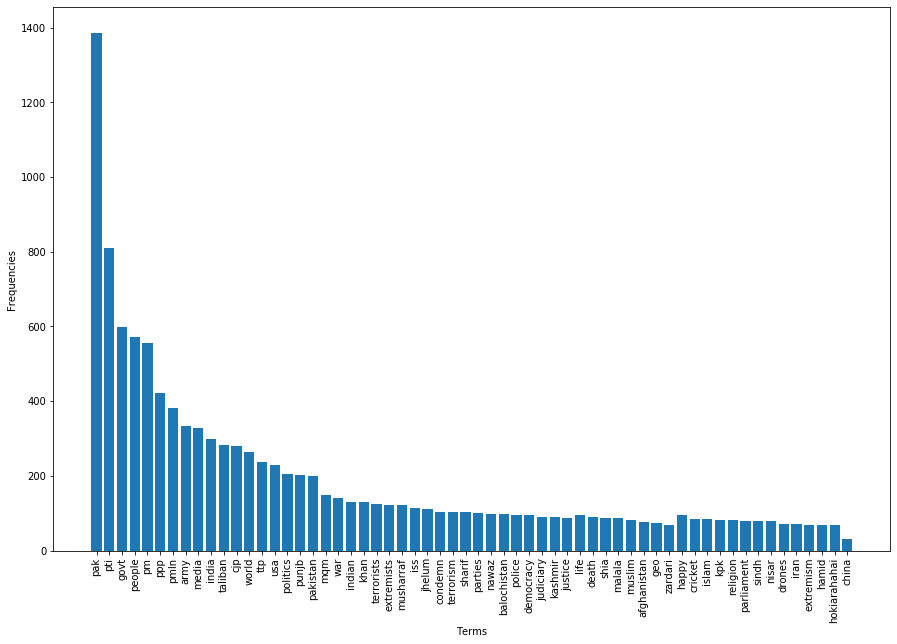

In [136]:
names = ["pak", "pti", "govt", "people", "pm", "ppp", "pmln", "army", "media", "india", "taliban", "cjp", "world", "ttp", "usa", "politics", "punjb", "pakistan", "mqm", "war", "indian", "khan", "terrorists", "extremists", "musharraf", "iss", "jhelum", "condemn", "terrorism", "sharif", "parties", "nawaz", "balochistan", "police", "democracy", "judiciary", "kashmir", "justice", "life", "death", "shia", "malala", "muslim", "afghanistan", "geo", "zardari", "happy", "cricket", "islam", "kpk", "religion", "parliament", "sindh", "nisar", "drones", "iran", "extremism", "hamid", "hokiarahahai", "china"]

values = []
for name in names:
    values.append(freqdist[name])

plt.figure(figsize=(15,10))
plt.bar(names, values)
plt.xticks(rotation=90)
plt.xlabel("Terms")
plt.ylabel("Frequencies")
plt.show()

#### Interesting unigrams frequency comparison

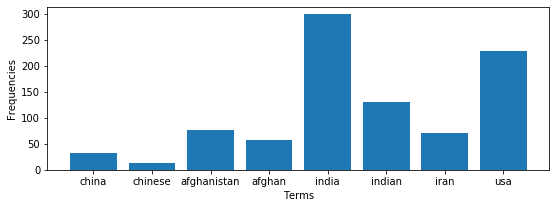

In [184]:
names = ["china", "chinese", "afghanistan", "afghan", "india", "indian", "iran", "usa"]

values = []
for name in names:
    values.append(freqdist[name])

plt.figure(figsize=(9,3))
plt.bar(names, values)
# plt.xticks(rotation=50)
plt.xlabel("Terms")
plt.ylabel("Frequencies")
plt.show()

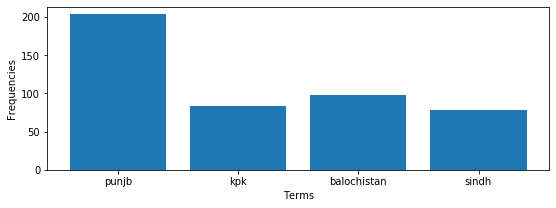

In [210]:
names = ["punjb", "kpk", "balochistan", "sindh"]

values = []
for name in names:
    values.append(freqdist[name])

plt.figure(figsize=(9,3))
plt.bar(names, values)
# plt.xticks(rotation=50)
plt.xlabel("Terms")
plt.ylabel("Frequencies")
plt.show()

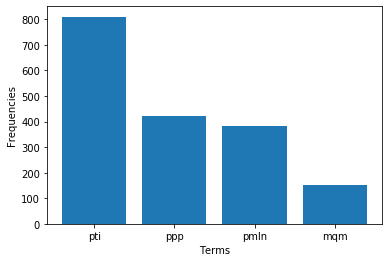

In [134]:
names = ["pti", "ppp", "pmln", "mqm"]

values = []
for name in names:
    values.append(freqdist[name])

# plt.figure(figsize=(7,3))
plt.bar(names, values)
# plt.xticks(rotation=50)
plt.xlabel("Terms")
plt.ylabel("Frequencies")
plt.show()

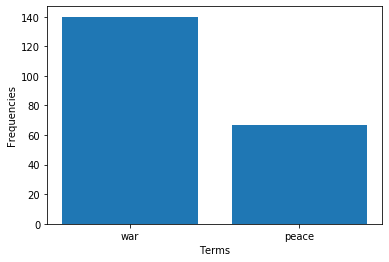

In [137]:
names = ["war", "peace"]

values = []
for name in names:
    values.append(freqdist[name])

# plt.figure(figsize=(7,3))
plt.bar(names, values)
# plt.xticks(rotation=50)
plt.xlabel("Terms")
plt.ylabel("Frequencies")
plt.show()

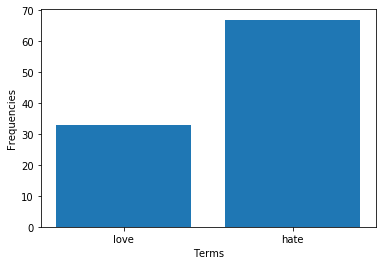

In [208]:
names = ["love", "hate"]

values = []
for name in names:
    values.append(freqdist[name])

# plt.figure(figsize=(15,10))
plt.bar(names, values)
# plt.xticks(rotation=50)
plt.xlabel("Terms")
plt.ylabel("Frequencies")
plt.show()

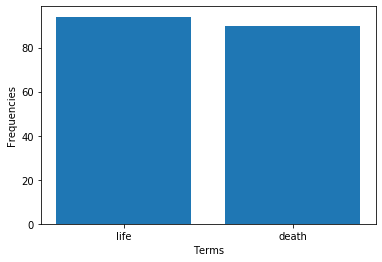

In [209]:
names = ["life", "death"]

values = []
for name in names:
    values.append(freqdist[name])

# plt.figure(figsize=(15,10))
plt.bar(names, values)
# plt.xticks(rotation=50)
plt.xlabel("Terms")
plt.ylabel("Frequencies")
plt.show()

### Bi-grams

In [174]:
bi_grams_fawadchaudhry = ngrams(fawadchaudhry_tokens, 2)
freqdist_bi = frequency_distribution(bi_grams_fawadchaudhry)
print(freqdist_bi.most_common(100))

[(('u', 'r'), 181), (('thy', 'r'), 151), (('r', 'nt'), 139), (('#', 'pti'), 89), (('#', 'hokiarahahai'), 68), (('k', 'liye'), 67), (('people', 'like'), 55), (('rahay', 'hein'), 55), (('ifti', 'ch'), 54), (('#', 'bbz'), 51), (('hai', 'k'), 50), (('#', 'khabrkpeechay'), 47), (('ho', 'ga'), 46), (('u', 'need'), 44), (('lal', 'mosque'), 43), (('ch', 'nisar'), 42), (('army', 'chief'), 41), (('n', 'u'), 41), (('bt', 'nt'), 40), (('nawaz', 'sharif'), 39), (('k', 'sath'), 39), (('bt', 'u'), 39), (('pak', 'n'), 39), (('u', 'want'), 39), (('shld', 'nt'), 39), (('dont', 'knw'), 39), (('hota', 'hai'), 37), (('hai', 'na'), 36), (('raha', 'hai'), 36), (('u', 'guys'), 35), (('pak', 'army'), 34), (('prog', '#'), 34), (('must', 'nt'), 34), (('#', 'malala'), 33), (('app', 'ko'), 32), (('punjb', 'govt'), 32), (('first', 'time'), 32), (('would', 'hve'), 32), (('get', 'rid'), 30), (('imran', 'khan'), 30), (('n', 'pak'), 30), (('k', 'khilaf'), 30), (('kh', 'asif'), 30), (('wht', 'u'), 30), (('u', 'think'), 

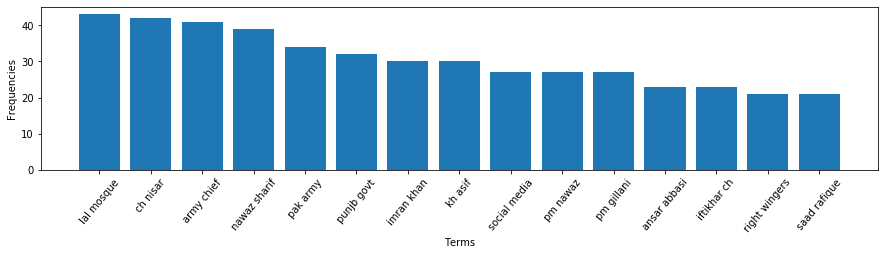

In [175]:
names_2 = [('lal', 'mosque'), ('ch', 'nisar'), ('army', 'chief'), ('nawaz', 'sharif'), ('pak', 'army'), ('punjb', 'govt'), ('imran', 'khan'), ('kh', 'asif'), ('social', 'media'), ('pm', 'nawaz'), ('pm', 'gillani'), ('ansar', 'abbasi'), ('iftikhar', 'ch'), ('right', 'wingers'), ('saad', 'rafique')]
names = ["lal mosque", "ch nisar", "army chief", "nawaz sharif", "pak army", "punjb govt", "imran khan", "kh asif", "social media", "pm nawaz", "pm gillani", "ansar abbasi", "iftikhar ch", "right wingers", "saad rafique"]

values = []
for name in names_2:
    values.append(freqdist_bi[name])

plt.figure(figsize=(15,3))
plt.bar(names, values)
plt.xticks(rotation=50)
plt.xlabel("Terms")
plt.ylabel("Frequencies")
plt.show()

### Tri-grams

In [189]:
tri_grams_fawadchaudhry = ngrams(fawadchaudhry_tokens, 3)
freqdist_3 = frequency_distribution(tri_grams_fawadchaudhry)
print(freqdist_3.most_common(100))

[(('thy', 'r', 'nt'), 24), (('prog', '#', 'khabrkpeechay'), 23), (('ker', 'rahay', 'hein'), 21), (('yeah', 'hai', 'k'), 17), (('u', 'r', 'nt'), 15), (('totally', 'unable', 'understand'), 14), (('ho', 'sakta', 'hai'), 13), (('#', 'khabrkpeechay', 'discuss'), 12), (('#', 'hokiarahahai', '10pm'), 12), (('people', 'like', 'u'), 12), (('must', 'take', 'notice'), 11), (('quaid', 'e', 'azam'), 10), (('tax', 'payers', 'money'), 10), (('#', 'hokiarahahai', '10'), 10), (('_', '_', '_'), 10), (('short', 'words', 'condemn'), 9), (('kia', 'pochein', 'k'), 9), (('hokiarahahai', '10', 'pm'), 9), (('cjp', 'ifti', 'ch'), 9), (('n', 'u', 'r'), 8), (('se', 'mey', 'ka'), 8), (('ka', 'jawaz', 'kia'), 8), (('jawaz', 'kia', 'pochein'), 8), (('pochein', 'k', 'chandni'), 8), (('k', 'chandni', 'ko'), 8), (('afsoos', 'hota', 'hai'), 8), (('u', 'guys', 'r'), 8), (('kia', 'kerna', 'hai'), 7), (('k', 'naam', 'per'), 7), (('watch', '#', 'khabrkpeechay'), 7), (('nt', 'first', 'time'), 7), (('u', 'r', 'right'), 7), ((

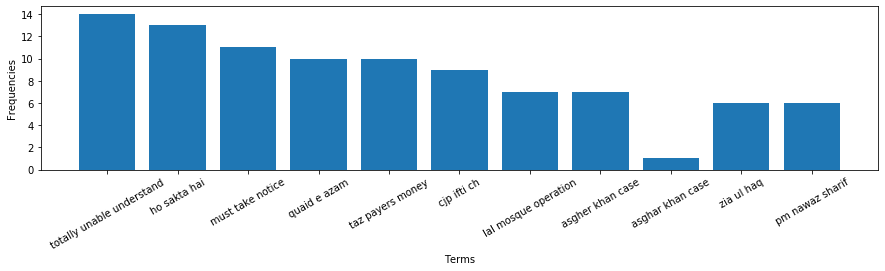

In [190]:
names_2 = [('totally', 'unable', 'understand'), ('ho', 'sakta', 'hai'), ('must', 'take', 'notice'), ('quaid', 'e', 'azam'), ('tax', 'payers', 'money'), ('cjp', 'ifti', 'ch'), ('lal', 'mosque', 'operation'), ('asgher', 'khan', 'case'), ('asghar', 'khan', 'case'), ('zia', 'ul', 'haq'), ('pm', 'nawaz', 'sharif')]
names = ["totally unable understand", "ho sakta hai", "must take notice", "quaid e azam", "taz payers money", "cjp ifti ch", "lal mosque operation", "asgher khan case", "asghar khan case", "zia ul haq", "pm nawaz sharif"]

values = []
for name in names_2:
    values.append(freqdist_3[name])

plt.figure(figsize=(15,3))
plt.bar(names, values)
plt.xticks(rotation=30)
plt.xlabel("Terms")
plt.ylabel("Frequencies")
plt.show()

### N-grams

In [197]:
n_grams_fawadchaudhry = ngrams(fawadchaudhry_tokens, 10)
freqdist_4 = frequency_distribution(n_grams_fawadchaudhry)
print(freqdist_4.most_common(100))

[(('e', 'shehr', 'se', 'mey', 'ka', 'jawaz', 'kia', 'pochein', 'k', 'chandni'), 4), (('shehr', 'se', 'mey', 'ka', 'jawaz', 'kia', 'pochein', 'k', 'chandni', 'ko'), 4), (('se', 'mey', 'ka', 'jawaz', 'kia', 'pochein', 'k', 'chandni', 'ko', 'b'), 4), (('mey', 'ka', 'jawaz', 'kia', 'pochein', 'k', 'chandni', 'ko', 'b', 'hazrat'), 4), (('ka', 'jawaz', 'kia', 'pochein', 'k', 'chandni', 'ko', 'b', 'hazrat', 'haram'), 4), (('jawaz', 'kia', 'pochein', 'k', 'chandni', 'ko', 'b', 'hazrat', 'haram', 'kehtay'), 4), (('kia', 'pochein', 'k', 'chandni', 'ko', 'b', 'hazrat', 'haram', 'kehtay', 'hein'), 4), (('pic', 'tragedy', 'intends', 'file', 'class', 'action', 'suit', 'govt', 'knw', 'victim'), 3), (('tragedy', 'intends', 'file', 'class', 'action', 'suit', 'govt', 'knw', 'victim', 'pl'), 3), (('intends', 'file', 'class', 'action', 'suit', 'govt', 'knw', 'victim', 'pl', 'ask'), 3), (('file', 'class', 'action', 'suit', 'govt', 'knw', 'victim', 'pl', 'ask', 'contact'), 3), (('class', 'action', 'suit', '

#### Interesting phrase used by fawad chaudhry found using n-grams

In [207]:
tweets, labels = load_data(DATASETS_PATH + 'dataset.csv')
for tweet in tweets:
    if tweet.find("jawaz") != -1:
        print(tweet)

faqih e shehr se mey ka jawaz kia pochein k chandni ko hazrat haram kehtay hein today is faiz bd 
 janab e sheikh se mey ka jawaz kia pochein k chandni ko b hazrat haram kehtay hein 
 janab e sheikh se mey ka jawaz kia pochein k chandni ko b hazrat aram kehtay hein 
faqeh e shehr se mey ka jawaz kia pochein k channdni ko b hazrat haram kehta hein #happyvalentine sday
 faqi e shehr se mey ka jawaz kia pochein k chandni ko b hazrat haram kehtay hein 
 faqeh e shehr se mey ka jawaz kia pochein k chandni ko hazrat haram kehtay hein 
 faqih e shehr se mey ka jawaz kia pochein k chandni ko b hazrat haram kehtay hein 
 faqih e shehr se ma ie ka jawaz kia pochein k chandni ko b hazrat haram kehtay hein faiz 


## Maryam nawaz

In [12]:
freqdist2 = frequency_distribution(maryamnsharif_tokens)
print(freqdist2.most_common(1000))

[('u', 2591), ('#', 1419), ('pmln', 1219), ('amp', 1134), ('sharif', 961), ('nawaz', 779), ('ur', 765), ('n', 661), ('allah', 646), ('pakistan', 628), ('pm', 591), ('ns', 517), ('pml', 516), ('one', 500), ('good', 494), ('pti', 489), ('r', 475), ('see', 462), ('rt', 393), ('pak', 392), ('ia', 388), ('thank', 383), ('time', 375), ('today', 375), ('bless', 367), ('thanks', 367), ('may', 363), ('people', 357), ('great', 346), ('well', 342), ('yes', 327), ('leader', 319), ('ppl', 317), ('pls', 315), ('god', 308), ('like', 306), ('know', 305), ('minister', 300), ('punjab', 296), ('us', 295), ('would', 283), ('govt', 282), ('ik', 280), ('need', 280), ('also', 277), ('day', 272), ('party', 267), ('political', 259), ('prime', 259), ('v', 256), ('mian', 255), ('true', 254), ('never', 251), ('youth', 248), ('must', 247), ('2', 234), ('hai', 233), ('love', 233), ('na', 231), ('sb', 230), ('happy', 228), ('say', 227), ('cm', 225), ('inshaallah', 225), ('every', 223), ('mam', 221), ('work', 218), (

In [13]:
bi_grams_maryamnsharif = ngrams(maryamnsharif_tokens, 2)
freqdist_bi2 = frequency_distribution(bi_grams_maryamnsharif)
print(freqdist_bi2.most_common(100))

[(('nawaz', 'sharif'), 683), (('pml', 'n'), 488), (('thank', 'u'), 270), (('#', 'pmln'), 257), (('god', 'bless'), 252), (('prime', 'minister'), 246), (('may', 'allah'), 164), (('u', 'r'), 134), (('shahbaz', 'sharif'), 115), (('pm', 'ns'), 103), (('insha', 'allah'), 101), (('#', 'nawazsharif'), 95), (('bless', 'u'), 91), (('allah', 'bless'), 89), (('well', 'done'), 83), (('mian', 'sb'), 77), (('u', 'ur'), 67), (('happy', 'birthday'), 66), (('r', 'u'), 63), (('stay', 'blessed'), 62), (('mian', 'nawaz'), 61), (('imran', 'khan'), 59), (('u', 'know'), 55), (('punjab', 'govt'), 54), (('na', '120'), 53), (('social', 'media'), 51), (('rule', 'law'), 51), (('pm', 'youth'), 51), (('minister', 'nawaz'), 49), (('u', 'guys'), 49), (('good', 'wishes'), 48), (('metro', 'bus'), 48), (('#', 'pakistan'), 44), (('1', '2'), 43), (('u', 'u'), 42), (('u', 'need'), 41), (('load', 'shedding'), 39), (('u', 'think'), 39), (('#', 'pti'), 38), (('long', 'life'), 37), (('team', 'pmln'), 35), (('v', 'kind'), 35), (

In [14]:
tri_grams_maryamnsharif = ngrams(maryamnsharif_tokens, 3)
freqdist_33 = frequency_distribution(tri_grams_maryamnsharif)
print(freqdist_33.most_common(100))

[(('may', 'allah', 'bless'), 65), (('god', 'bless', 'u'), 63), (('mian', 'nawaz', 'sharif'), 53), (('prime', 'minister', 'nawaz'), 49), (('minister', 'nawaz', 'sharif'), 48), (('youth', 'business', 'loans'), 31), (('allah', 'bless', 'u'), 27), (('pm', 'nawaz', 'sharif'), 26), (('prime', 'minister', 'sharif'), 24), (('#', 'pmln', '#'), 23), (('muhammad', 'nawaz', 'sharif'), 23), (('pm', 'youth', 'business'), 21), (('may', 'allah', 'swt'), 19), (('thank', 'u', 'much'), 19), (('thank', 'u', 'ur'), 18), (('thanks', 'happy', 'birthday'), 18), (('bless', 'long', 'life'), 16), (('happy', 'new', 'year'), 16), (('love', 'nawaz', 'sharif'), 15), (('allah', 'bless', 'long'), 15), (('happy', 'b', 'day'), 15), (('u', 'god', 'bless'), 15), (('many', 'happy', 'returns'), 14), (('chief', 'nawaz', 'sharif'), 14), (('long', 'life', 'good'), 13), (('life', 'good', 'health'), 13), (('nawaz', 'sharif', '#'), 13), (('#', 'na120forpmln', '#'), 13), (('thank', 'u', 'sir'), 13), (('gt', 'gt', 'gt'), 13), (('pm

## Jibran Nasir

In [15]:
freqdist23 = frequency_distribution(mjibrannasir_tokens)
print(freqdist23.most_common(1000))

[('#', 7338), ('pakistan', 1132), ('amp', 1085), ('govt', 960), ('hai', 822), ('us', 798), ('police', 795), ('today', 791), ('kay', 697), ('ki', 689), ('main', 651), ('one', 639), ('support', 638), ('case', 622), ('karachi', 603), ('ka', 566), ('also', 550), ('u', 533), ('court', 528), ('pti', 512), ('aur', 507), ('nahi', 499), ('ko', 497), ('hain', 471), ('like', 469), ('media', 457), ('ke', 452), ('aap', 448), ('thank', 441), ('sindh', 431), ('people', 430), ('say', 414), ('political', 398), ('would', 397), ('need', 373), ('protest', 373), ('right', 371), ('family', 369), ('please', 359), ('day', 341), ('pak', 330), ('take', 326), ('may', 325), ('pm', 322), ('time', 322), ('dont', 319), ('na', 318), ('party', 310), ('citizens', 302), ('justice', 299), ('state', 297), ('bhi', 297), ('se', 293), ('toh', 292), ('pakistani', 291), ('law', 291), ('see', 290), ('e', 290), ('ppp', 289), ('issue', 286), ('well', 286), ('tomorrow', 285), ('still', 283), ('islamabad', 281), ('hope', 278), ('as

In [16]:
bi_grams_mjibrannasir = ngrams(mjibrannasir_tokens, 2)
freqdist_bi23 = frequency_distribution(bi_grams_mjibrannasir)
print(freqdist_bi23.most_common(100))

[(('abdul', 'aziz'), 212), (('#', 'raoanwar'), 191), (('#', 'humqadam'), 179), (('#', 'izhaar'), 152), (('#', 'naqeebmehsud'), 149), (('#', 'neverforget'), 148), (('supreme', 'court'), 145), (('press', 'club'), 123), (('#', 'aik'), 122), (('#', 'kashmir'), 117), (('support', '#'), 107), (('lal', 'masjid'), 105), (('civil', 'society'), 100), (('#', 'pakistan'), 99), (('#', 'ps111'), 98), (('#', 'mashalkhan'), 97), (('high', 'court'), 94), (('#', 'arrestabdulaziz'), 94), (('social', 'media'), 93), (('aap', 'ka'), 90), (('sindh', 'govt'), 87), (('trend', '#'), 87), (('#', 'parachinar'), 86), (('se', '#'), 85), (('mein', 'se'), 84), (('thank', 'u'), 83), (('#', 'peshawarattack'), 82), (('hate', 'speech'), 81), (('blue', 'jeans'), 81), (('rare', 'disease'), 80), (('disease', 'day'), 80), (('press', 'conference'), 79), (('#', 'pti'), 79), (('mumtaz', 'qadri'), 79), (('#', 'wearthatyoucare'), 79), (('wearing', 'blue'), 79), (('28', 'feb'), 78), (('support', 'world'), 78), (('world', 'rare'), 

In [17]:
tri_grams_mjibrannasir = ngrams(mjibrannasir_tokens, 3)
freqdist_333 = frequency_distribution(tri_grams_mjibrannasir)
print(freqdist_333.most_common(100))

[(('se', '#', 'aik'), 84), (('mein', 'se', '#'), 83), (('rare', 'disease', 'day'), 80), (('wearing', 'blue', 'jeans'), 79), (('support', 'world', 'rare'), 78), (('world', 'rare', 'disease'), 78), (('selfie', 'wearing', 'blue'), 77), (('trend', '#', 'wearthatyoucare'), 77), (('support', '#', 'genesribbon'), 76), (('#', 'genesribbon', 'support'), 76), (('genesribbon', 'support', 'world'), 76), (('disease', 'day', 'post'), 76), (('day', 'post', 'selfie'), 76), (('post', 'selfie', 'wearing'), 76), (('blue', 'jeans', '28'), 76), (('jeans', '28', 'feb'), 76), (('28', 'feb', 'amp'), 76), (('feb', 'amp', 'trend'), 76), (('amp', 'trend', '#'), 76), (('#', 'wearthatyoucare', 'support'), 74), (('wearthatyoucare', 'support', '#'), 74), (('aap', 'ka', 'numainda'), 73), (('#', 'neverforget', '#'), 71), (('aap', 'mein', 'se'), 69), (('ka', 'numainda', 'aap'), 66), (('numainda', 'aap', 'mein'), 66), (('#', 'humqadam', 'idp'), 54), (('#', 'naqeebmehsud', 'case'), 50), (('neverforget', '#', 'peshawaratt

## Modi

In [18]:
freqdist24 = frequency_distribution(narendramodi_tokens)
print(freqdist24.most_common(1000))

[('india', 4121), ('people', 2488), ('#', 1763), ('today', 1205), ('ji', 1111), ('development', 1003), ('nation', 839), ('also', 836), ('day', 817), ('amp', 794), ('great', 793), ('towards', 770), ('gujarat', 769), ('life', 741), ('us', 737), ('bjp', 728), ('congress', 718), ('work', 714), ('world', 712), ('government', 676), ('good', 650), ('wishes', 642), ('best', 637), ('may', 632), ('state', 626), ('thank', 614), ('president', 602), ('indian', 589), ('meeting', 588), ('years', 575), ('shri', 574), ('new', 562), ('greetings', 554), ('efforts', 542), ('across', 537), ('ties', 536), ('proud', 531), ('pm', 514), ('lives', 511), ('long', 507), ('visit', 507), ('spoke', 496), ('well', 485), ('wonderful', 463), ('forward', 462), ('sharing', 453), ('programme', 451), ('always', 450), ('congratulations', 446), ('various', 442), ('many', 437), ('health', 429), ('progress', 429), ('youth', 429), ('one', 417), ('time', 414), ('birthday', 396), ('poor', 393), ('happy', 392), ('support', 382), (

In [19]:
bi_grams_narendramodi = ngrams(narendramodi_tokens, 2)
freqdist_bi25 = frequency_distribution(bi_grams_narendramodi)
print(freqdist_bi25.most_common(100))

[(('best', 'wishes'), 359), (('#', 'mannkibaat'), 305), (('looking', 'forward'), 228), (('good', 'health'), 219), (('birth', 'anniversary'), 195), (('look', 'forward'), 188), (('let', 'us'), 181), (('long', 'life'), 179), (('swachh', 'bharat'), 175), (('covid', '19'), 165), (('healthy', 'life'), 162), (('across', 'india'), 157), (('long', 'healthy'), 152), (('people', 'india'), 136), (('every', 'indian'), 136), (('sisters', 'brothers'), 133), (('crore', 'indians'), 131), (('#', 'indiafightscorona'), 124), (('wide', 'range'), 122), (('j', 'k'), 111), (('new', 'heights'), 110), (('public', 'meeting'), 109), (('birthday', 'greetings'), 108), (('india', 'proud'), 105), (('rest', 'peace'), 100), (('atal', 'ji'), 99), (('soul', 'rest'), 98), (('lok', 'sabha'), 98), (('prime', 'minister'), 97), (('may', 'soul'), 96), (('west', 'bengal'), 96), (('young', 'friends'), 94), (('bharat', 'mission'), 94), (('birthday', 'wishes'), 88), (('greetings', 'people'), 87), (('earlier', 'today'), 87), (('lar

In [20]:
tri_grams_narendramodi = ngrams(narendramodi_tokens, 3)
freqdist_334 = frequency_distribution(tri_grams_narendramodi)
print(freqdist_334.most_common(100))

[(('long', 'healthy', 'life'), 151), (('soul', 'rest', 'peace'), 97), (('may', 'soul', 'rest'), 95), (('swachh', 'bharat', 'mission'), 93), (('125', 'crore', 'indians'), 65), (('130', 'crore', 'indians'), 59), (('health', 'long', 'life'), 52), (('pray', 'long', 'healthy'), 46), (('long', 'life', 'good'), 45), (('life', 'good', 'health'), 44), (('asian', 'para', 'games'), 44), (('may', 'almighty', 'bless'), 41), (('month', '#', 'mannkibaat'), 40), (('wide', 'range', 'issues'), 40), (('good', 'health', 'long'), 40), (('via', 'video', 'conferencing'), 39), (('new', 'heights', 'progress'), 38), (('fight', 'covid', '19'), 37), (('para', 'games', '2018'), 37), (('1800', '11', '7800'), 35), (('vote', 'large', 'numbers'), 34), (('may', 'blessed', 'long'), 33), (('people', 'across', 'india'), 33), (('pray', 'long', 'life'), 32), (('dr', 'babasaheb', 'ambedkar'), 32), (('people', 'people', 'ties'), 32), (('pm', 'sheikh', 'hasina'), 32), (('people', 'walks', 'life'), 31), (('leave', 'stone', 'unt

## Sherry Rehman

In [21]:
freqdist26 = frequency_distribution(sherryrehman_tokens)
print(freqdist26.most_common(1000))

[('#', 4687), ('pakistan', 2229), ('u', 870), ('us', 805), ('govt', 725), ('r', 598), ('today', 580), ('women', 557), ('new', 544), ('good', 532), ('one', 508), ('india', 505), ('rt', 448), ('many', 442), ('time', 420), ('like', 415), ('need', 382), ('may', 372), ('day', 346), ('ppp', 344), ('senate', 339), ('people', 337), ('see', 327), ('world', 306), ('even', 305), ('right', 303), ('still', 300), ('yes', 298), ('must', 288), ('also', 286), ('thank', 285), ('hope', 282), ('peace', 275), ('first', 275), ('well', 274), ('public', 272), ('2', 267), ('go', 261), ('way', 260), ('sindh', 260), ('much', 253), ('get', 251), ('parliament', 245), ('pk', 245), ('big', 243), ('karachi', 238), ('islamabad', 236), ('afghanistan', 235), ('change', 235), ('know', 231), ('back', 229), ('needs', 228), ('says', 226), ('make', 220), ('take', 220), ('pm', 220), ('better', 215), ('pak', 214), ('work', 208), ('indian', 207), ('would', 205), ('power', 204), ('years', 203), ('pakistani', 201), ('policy', 197

In [22]:
bi_grams_sherryrehman = ngrams(sherryrehman_tokens, 2)
freqdist_bi26 = frequency_distribution(bi_grams_sherryrehman)
print(freqdist_bi26.most_common(100))

[(('#', 'pakistan'), 845), (('thank', 'u'), 178), (('pakistan', '#'), 136), (('#', 'ppp'), 116), (('#', 'india'), 104), (('#', 'us'), 85), (('#', 'afghanistan'), 80), (('climate', 'change'), 66), (('human', 'rights'), 62), (('rt', '#'), 62), (('well', 'done'), 56), (('#', 'syria'), 52), (('south', 'asia'), 50), (('foreign', 'policy'), 50), (('today', '#'), 49), (('rest', 'peace'), 43), (('sorry', 'hear'), 43), (('national', 'assembly'), 42), (('#', 'women'), 42), (('benazir', 'bhutto'), 40), (('national', 'security'), 40), (('federal', 'govt'), 39), (('us', '#'), 38), (('strongly', 'condemn'), 38), (('pakistan', 'india'), 38), (('#', 'pakistani'), 37), (('way', 'forward'), 36), (('good', 'news'), 36), (('every', 'day'), 34), (('sindh', 'govt'), 34), (('india', 'pakistan'), 33), (('india', '#'), 33), (('may', 'god'), 32), (('many', 'us'), 32), (('#', 'iran'), 32), (('public', 'accounts'), 31), (('pak', 'us'), 31), (('may', 'rest'), 30), (('happy', 'birthday'), 29), (('pakistan', 'needs'

In [23]:
tri_grams_sherryrehman = ngrams(sherryrehman_tokens, 3)
freqdist_336 = frequency_distribution(tri_grams_sherryrehman)
print(freqdist_336.most_common(100))

[(('#', 'pakistan', '#'), 103), (('may', 'rest', 'peace'), 29), (('#', 'india', '#'), 28), (('public', 'accounts', 'committee'), 27), (('pakistan', '#', 'india'), 24), (('india', '#', 'pakistan'), 23), (('#', 'us', '#'), 17), (('#', 'pakistan', 'rt'), 16), (('rt', '#', 'pakistan'), 16), (('may', 'god', 'give'), 14), (('heart', 'goes', 'families'), 12), (('well', 'done', '#'), 10), (('indian', 'held', 'kashmir'), 9), (('climate', 'change', 'caucus'), 9), (('national', 'security', 'committee'), 9), (('pak', 'us', 'ties'), 9), (('#', 'afghanistan', '#'), 9), (('today', '#', 'pakistan'), 9), (('#', 'pakistan', 'good'), 9), (('fortitude', 'bear', 'loss'), 8), (('live', 'long', 'prosper'), 8), (('shaheed', 'benazir', 'bhutto'), 8), (('#', 'ppp', '#'), 8), (('national', 'action', 'plan'), 8), (('thank', 'u', '#'), 8), (('#', 'pakistan', 'us'), 8), (('thank', 'u', 'much'), 8), (('#', 'pakistan', 'new'), 8), (('#', 'women', '#'), 8), (('#', 'pak', 'us'), 8), (('#', 'pakistan', 'embassy'), 8), (